In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import numpy as np

from consumption_saving import *

In [125]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [126]:
value_function_employment(model.par, model.sol)

In [127]:
model.sol.a_next_e[-1,0,:]

array([-2.00191085e+00, -1.89664791e+00, -1.79138498e+00, -1.68612204e+00,
       -1.58085910e+00, -1.47559617e+00, -1.37033323e+00, -1.26507030e+00,
       -1.15980736e+00, -1.05454442e+00, -9.49281487e-01, -8.44018551e-01,
       -7.38755615e-01, -6.33492679e-01, -5.28229743e-01, -4.22966806e-01,
       -3.17703870e-01, -2.12440934e-01, -1.07177998e-01, -1.91506161e-03])

In [128]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 20)


array([-4.48369181, -4.18046675, -3.89884933, -3.6402735 , -3.40631746,
       -3.1987237 , -3.01942262, -2.87056052, -2.75453308, -2.67402556,
       -2.63206136, -2.38795365, -2.15872383, -1.94570931, -1.75043863,
       -1.57467096, -1.42044657, -1.29015241, -1.1866088 , -1.11318611,
       -1.07396539, -0.92968651, -0.79378924, -0.66705397, -0.550385  ,
       -0.44484067, -0.35167384, -0.27238769, -0.20881472, -0.16323247,
       -0.13853985, -0.13853985, -0.13853985, -0.13853985, -0.13853985,
       -0.13853985, -0.13853985, -0.13853985, -0.13853985, -0.13853985,
       -0.13853985])

In [129]:
print(np.shape(model.par.V_e))
model.par.V_e[-1,:,-1]

(41, 20, 20)


array([ 4.26546069e+00,  3.36057269e+00,  2.59425305e+00,  1.94946412e+00,
        1.41291156e+00,  9.73934167e-01,  6.23793310e-01,  3.55196916e-01,
        1.61968606e-01,  3.88105531e-02, -1.88709214e-02, -1.50964833e-02,
       -1.17415135e-02, -8.80598965e-03, -6.28988962e-03, -4.19319171e-03,
       -2.51587457e-03, -1.25791724e-03, -4.19299129e-04,  0.00000000e+00])

In [130]:
V_u,s = unemployment_ss(model.par, -1,-1)
print(V_u,s)

bellman_difference(-1) = 0.46819196010915154
bellman_difference(1) = -0.38519484650207425
-0.019644635044963776 0.42808202186943345


In [131]:
solve_search_and_consumption(model.par, model.sol)

bellman_difference(-1) = -0.8892874780891007
bellman_difference(1) = -0.8636348954315662
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8892874780891007, -0.9263612367603334
Trying interval [-5, 0] with function values 0.25700855659583066, -0.9263612367603334
Found valid interval: [-5, 0] with function values 0.25700855659583066, -0.9263612367603334
bellman_difference(-1) = -0.8892874780891007
bellman_difference(1) = -0.8636348954315662
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8892874780891007, -0.9263612367603334
Trying interval [-5, 0] with function values 0.25700855659583066, -0.9263612367603334
Found valid interval: [-5, 0] with function values 0.25700855659583066, -0.9263612367603334
bellman_difference(-1) = -0.8660708493071061
bellman_difference(1) = -0.886730875864091
The function d

In [132]:
model.sol.s[-3,:]

array([0.42962337, 0.42962348, 0.42088259, 0.40589708, 0.39771348,
       0.39111288, 0.38429961, 0.38217831, 0.37807992, 0.37767142,
       0.37703391, 0.3769726 , 0.376911  , 0.37684937, 0.37678775,
       0.37672614, 0.37666454, 0.37660294, 0.37654135, 0.37647977])

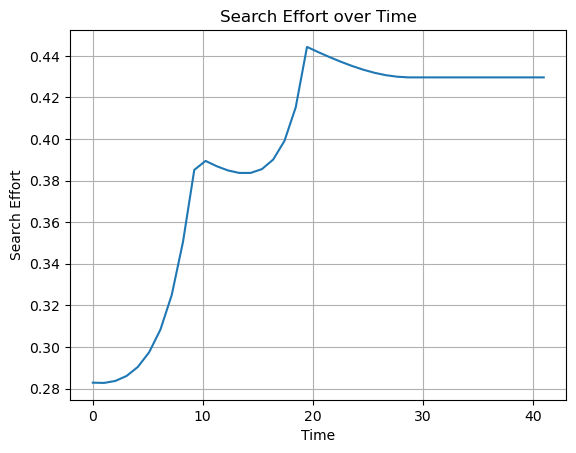

In [133]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


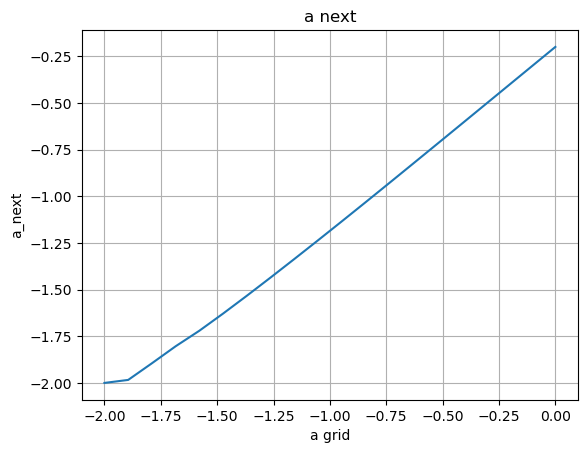

In [134]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [135]:
model1 = model.copy()
# model1.par.L = -0.00
# model1.par.a_grid = np.linspace(model1.par.L, model1.par.A_0, 20)
model1.par.euler = False

In [136]:
value_function_employment(model1.par, model1.sol)

In [137]:
solve_search_and_consumption(model1.par, model1.sol)

bellman_difference(-1) = -0.8640364640080815
bellman_difference(1) = -0.8894304633784865
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8640364640080815, -0.9266335136932841
Trying interval [-5, 0] with function values 0.3843527347327278, -0.9266335136932841
Found valid interval: [-5, 0] with function values 0.3843527347327278, -0.9266335136932841
bellman_difference(-1) = -0.8640364640080815
bellman_difference(1) = -0.8894304633784865
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8640364640080815, -0.9266335136932841
Trying interval [-5, 0] with function values 0.3843527347327278, -0.9266335136932841
Found valid interval: [-5, 0] with function values 0.3843527347327278, -0.9266335136932841
bellman_difference(-1) = -0.8349312645874964
bellman_difference(1) = -0.9065881830607327
The function does

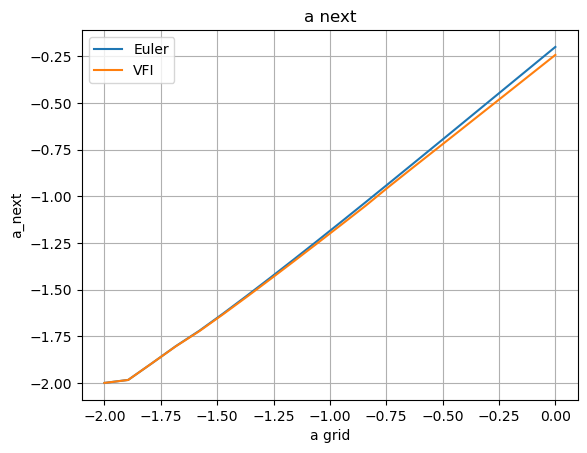

In [138]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next[0,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.legend()
plt.grid(True)
plt.show()


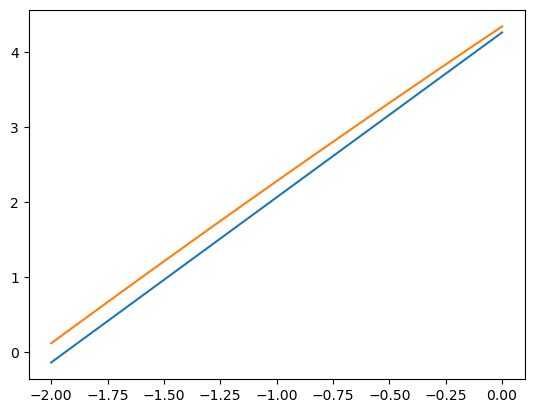

In [139]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(model.par.a_grid, model.par.V_e[-1,0,:])
plt.plot(model.par.a_grid, model1.par.V_e[-1,0,:])

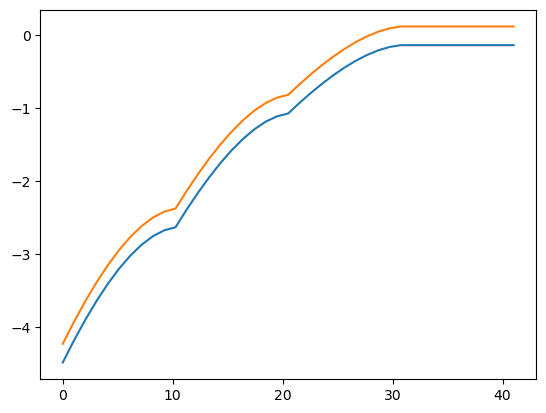

In [140]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[:,0,0])
plt.plot(time, model1.par.V_e[:,0,0])

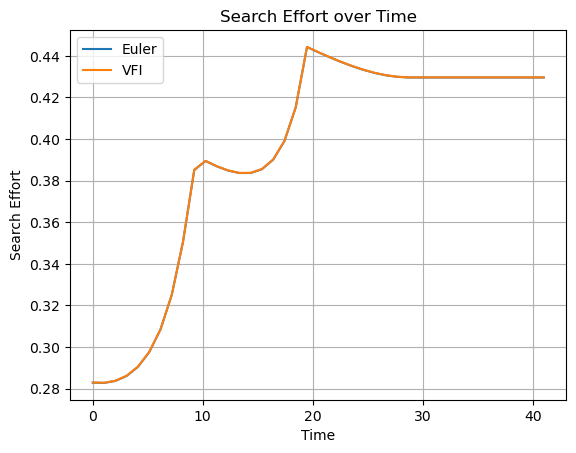

In [141]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0], label='Euler')
plt.plot(time, model1.sol.s[:model1.par.T,0], label='VFI')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

In [142]:
solve_forward(model.par, model.sol, model.sim)

In [143]:
solve_forward(model1.par, model1.sol, model1.sim)

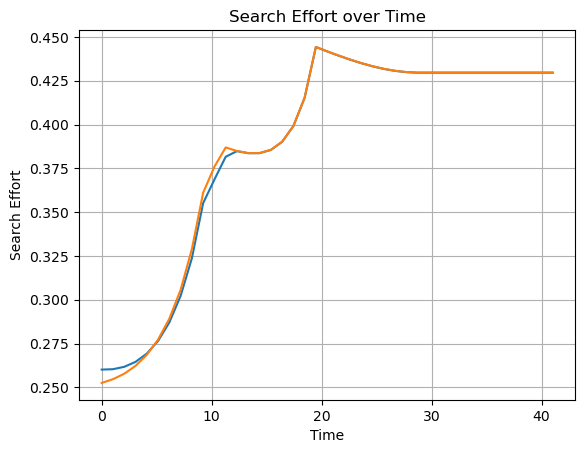

In [144]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T])
plt.plot(time, model1.sim.s[:model.par.T])

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


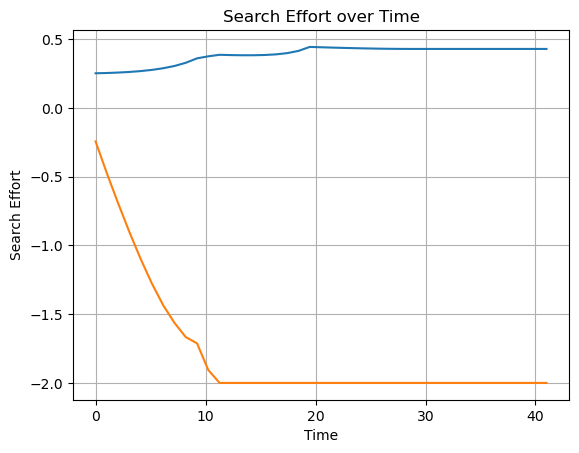

In [145]:
time = np.linspace(0, model.par.T, model.par.T)
# plt.plot(time, model.sim.s)
# plt.plot(time, model.sim.a_next)
plt.plot(time, model1.sim.s)
plt.plot(time, model1.sim.a_next)

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [146]:
solve_forward_employment(model.par, model.sol, model.sim)

In [147]:
solve_forward_employment(model1.par, model1.sol, model1.sim)

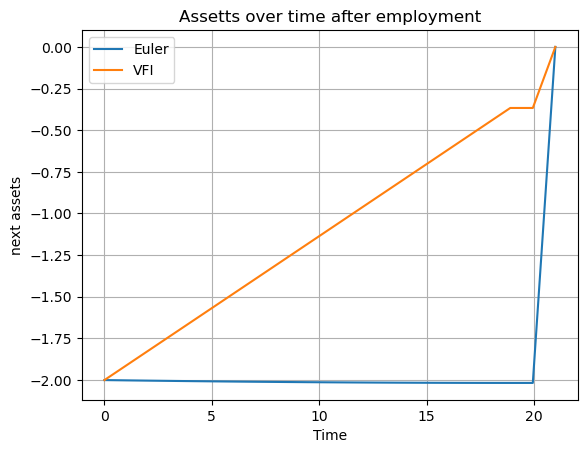

In [149]:
time = np.linspace(0, model.par.N+model.par.M+1, model.par.N+model.par.M+1)
plt.plot(time, model.sim.a_e[-1,:], label='Euler')
plt.plot(time, model1.sim.a_e[-1,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('next assets')
plt.title('Assetts over time after employment')
plt.grid(True)
plt.legend()
plt.show()